In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Normal Equation(정규 방정식을 사용한 선형 회귀)

In [3]:
import numpy as np

In [4]:
X = 2 * np.random.rand(100, 1) # rand : 0 ~ 1 / (100, 1) => row vector
y = 4 + 3 * X + np.random.randn(100, 1) # 4x + 3 + (random - gaussian noise)

그림 저장: generated_data_plot


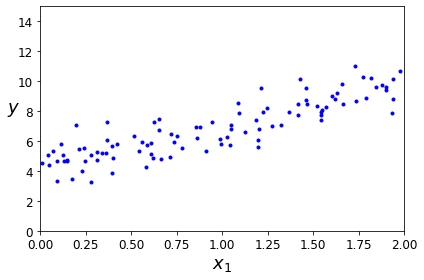

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Add x_0 (x_0 * bias), x_0 == 1

In [6]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [7]:
np.ones((100, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # c_[] : concat

In [12]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # calculate by normal equation
# real theta : 4, 3 but it has gaussian noise

array([[4.21509616],
       [2.77011339]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [14]:
# Test theta using new X
X_new = np.array([[0], [2]]) # column vector(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x_0(1)
y_predict = X_new_b.dot(theta_best)
y_predict
# y = 4 + 3 * x
# x = 0 -> y = 4(y_predict : 4.215)
# x = 2 -> y = 10(y_predict : 9.755)

array([[4.21509616],
       [9.75532293]])

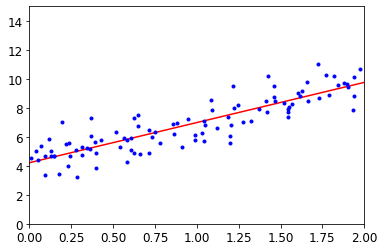

In [15]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

그림 저장: linear_model_predictions_plot


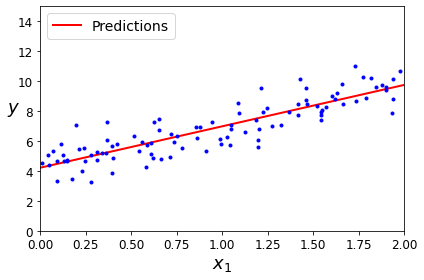

In [16]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

# 2. Gradient Descent
* update gradient each step
* Batch Gradient : use all training data for one step
* Stochastic : use one random training data for one step
* MiniBatch : use random mini training data set for one step

# 2-1 Linear Regression using Batch Gradient Descent(배치 경사 하강법을 사용한 선형 회귀)

### Batch gradient descent : Using all training data set for one step(update w, b)

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [20]:
X_b # (!00, 2)

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [21]:
eta = 0.1 # eta : learning rate
n_iterations = 1000 # number of iteration
m = 100 # number of samples

theta = np.random.randn(2, 1) # random initialization
# In 1(Normal Equation) we get theta value by using equation
# But we don't kwow theta value. so random initialization

for iteration in range(n_iterations) : # 1000 iteration(== step), (In this, epoch == step)
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y) # using all data(X)
    theta = theta - eta * gradients

In [24]:
'''
[Normal Equation] - theta best
array([[4.21509616],
       [2.77011339]])
'''
theta

array([[4.21509616],
       [2.77011339]])

In [26]:
'''
[Normal Equation] - y_prediction
array([[4.21509616],
       [9.75532293]])
'''
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

Graph to show Batch gradient descent first 10 step using 3 different eta(learning rate)

In [27]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


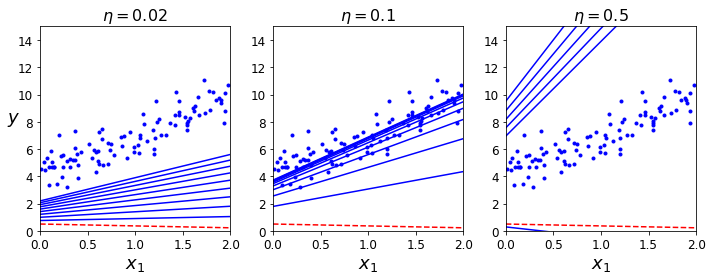

In [28]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# 2-2 Stochastic Gradient Descent(확률적 경사 하강법) - SGD

### Using random 1 sample for each step(update)

In [31]:
theta_path_sgd = []
m = len(X_b) # 100
np.random.seed(42)

In [61]:
n_epochs = 50
t0, t1 = 5, 50 # decide learning rate(eta) for each iteration

def learning_schedule(t) :
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

# 2 loops : convention
for epoch in range(n_epochs) : # n_epochs = 50
    for i in range(m) : # m : 100
        random_index = np.random.randint(m) # (0 ~ m-1) random number
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 2 = 2 / m (m = 1)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

In [62]:
theta

array([[4.21052071],
       [2.80272029]])

In [63]:
n_epochs = 50
t0, t1 = 5, 50 # decide learning rate(eta) for each iteration
m = 100
def learning_schedule(t) :
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

# same using 2 loops
for epoch in range(n_epochs) : # n_epochs = 50
    random_index = np.random.randint(m) # (0 ~ m-1) random number
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 2 = 2 / m (m = 1)
    eta = learning_schedule(epoch)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

In [64]:
theta

array([[4.30250433],
       [2.68177476]])

In [66]:
theta_path_sgd # change of theta value

[array([[1.47434987],
        [1.47306605]]),
 array([[1.8296528 ],
        [1.61427458]]),
 array([[2.52791789],
        [2.60311931]]),
 array([[2.8170435 ],
        [3.01256314]]),
 array([[2.93989688],
        [3.18654135]]),
 array([[3.22716678],
        [3.18971403]]),
 array([[3.18706696],
        [3.14847261]]),
 array([[3.26944529],
        [3.20883316]]),
 array([[3.29669317],
        [3.23237233]]),
 array([[3.36165381],
        [3.30028646]]),
 array([[3.41852086],
        [3.3915236 ]]),
 array([[3.40674563],
        [3.36981303]]),
 array([[3.22634884],
        [3.31896848]]),
 array([[3.11350463],
        [3.20721278]]),
 array([[3.24058135],
        [3.45371872]]),
 array([[3.23374641],
        [3.44654536]]),
 array([[3.31108813],
        [3.4917353 ]]),
 array([[3.50257436],
        [3.5160764 ]]),
 array([[3.60456377],
        [3.54789598]]),
 array([[3.52711337],
        [3.40236683]]),
 array([[3.59425365],
        [3.45977728]]),
 array([[3.42266578],
        [3.2

# 2-3 MiniBatch Gradient Descent

In [72]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t) :
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations) :
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size) :
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [73]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [81]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t) :
    return t0 / (t + t1)

t = 0

import random
xy = list(zip(X_b, y))
for epoch in range(n_iterations * minibatch_size) :
    mini_batch = random.sample(xy, minibatch_size) # pick random in xy as much as minibatch_size
    t +=1 
    xi = np.array([data[0] for data in mini_batch])
    yi = np.array([data[1] for data in mini_batch])
    gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

In [82]:
theta

array([[4.30139541],
       [2.78231914]])

In [83]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


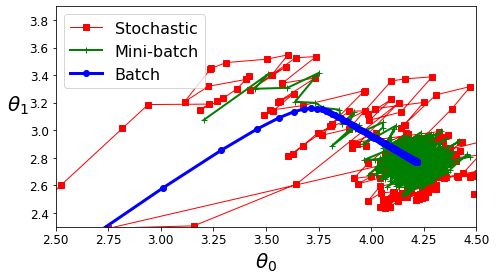

In [85]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show() # show change of theta value